In [8]:
import pandas as pd

In [9]:
data = pd.read_csv("../data/psd.bulk.zfish_atac.10hpf.lg1x.csv")

In [10]:
data.head()

,anterior/posterior axis,central nervous system,forebrain,immature eye,integument,lateral plate mesoderm,mesenchyme cell,musculature system,neural crest,neural keel,neural stem cell,periderm/epidermis,primary neuron,segmental plate,YSL
0,4.612648,5.204557,3.391132,4.552681,3.668004,4.766655,4.012215,4.486644,4.463738,4.861570,3.614023,3.696712,3.210026,4.679626,4.277916
1,4.721959,5.358137,3.557652,4.688727,3.546239,4.748463,4.012215,4.399901,4.690443,4.848311,3.776074,3.959122,3.531244,4.750276,4.439449
2,4.806994,5.338711,3.360469,4.163852,3.668004,4.955051,4.129443,4.353534,4.787046,4.735389,3.574781,4.325414,4.545861,4.917399,5.058778
3,4.879061,5.578282,4.236443,4.404106,4.145129,4.893466,4.429041,4.558759,4.650654,4.885431,4.076645,4.572297,4.306987,5.019714,4.859518
4,5.052703,5.736003,4.323331,4.790483,4.440677,5.033977,4.375875,4.868698,5.025405,5.054618,4.130548,4.473848,4.426082,5.211885,5.306444


In [11]:
data.shape

(370058, 15)

### To do

- Check if the distribution of all the cell types are similar
- Look at the counts of the cell types
- Look at the distributions of the max, min, medium of the peaks (locations and regions in the genome)
- Look at the distribution of standard deviation and coefficient of variation (R2) of the peaks
- Use the gRELU package to train the model:
    - Start with a snippet e.g. 1000 peaks
    - If it works:
        - Extend to all peaks and run on GPU e.g. 480 (16 GB)
    - Get the model trained and then use the trained model to analyze seqs

In [12]:
data.describe()

,anterior/posterior axis,central nervous system,forebrain,immature eye,integument,lateral plate mesoderm,mesenchyme cell,musculature system,neural crest,neural keel,neural stem cell,periderm/epidermis,primary neuron,segmental plate,YSL
count,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000,370058.000000
mean,2.473024,3.536111,2.023562,2.321343,2.346497,2.407008,2.532922,2.425564,2.447764,2.572684,2.064080,2.437607,2.253972,2.627580,2.613370
std,1.070666,0.827313,1.127322,1.023766,0.973497,1.160747,0.923803,1.022150,1.079779,0.987327,0.987930,1.124375,1.003211,0.971848,1.435154
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.789679,2.998886,1.305784,1.680234,1.703114,1.655804,1.915261,1.819059,1.807913,1.898183,1.401331,1.798457,1.559132,1.989127,1.747344
50%,2.395626,3.441339,1.984860,2.197871,2.300787,2.354598,2.409666,2.360297,2.415504,2.442039,1.841349,2.405200,2.141170,2.531056,2.489766
75%,3.081055,3.965430,2.606833,2.833898,2.860317,3.099481,3.004450,3.005098,3.062962,3.090720,2.451874,3.052174,2.812083,3.161576,3.434497
max,7.277513,7.664428,6.962817,7.172454,6.985725,7.268406,7.033311,6.855766,7.287214,7.398556,7.155829,7.462169,6.726133,7.145679,7.960923


In [14]:
data.columns

Index(['anterior/posterior axis', 'central nervous system', 'forebrain',
       'immature eye', 'integument', 'lateral plate mesoderm',
       'mesenchyme cell', 'musculature system', 'neural crest', 'neural keel',
       'neural stem cell', 'periderm/epidermis', 'primary neuron',
       'segmental plate', 'YSL'],
      dtype='object')

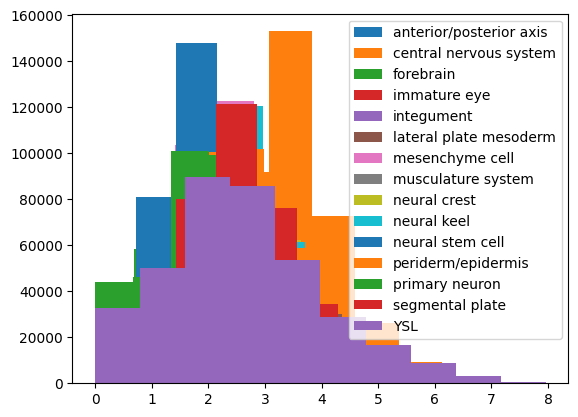

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

for cell_type in data.columns:
    plt.hist(data[cell_type], label = cell_type)

plt.legend()

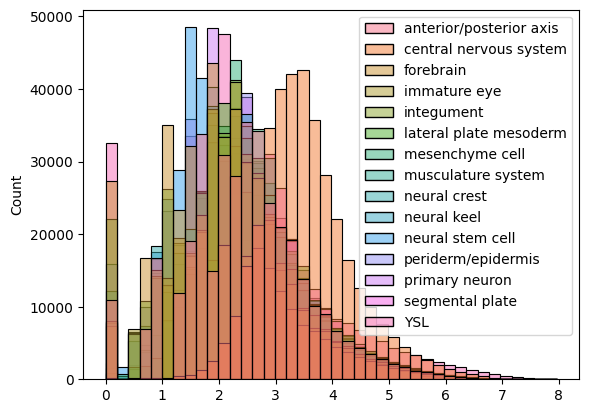

In [28]:
_ = sns.histplot(data, bins = 40)

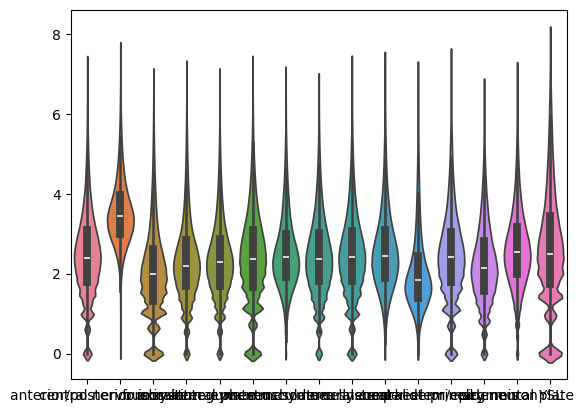

In [30]:
_ = sns.violinplot(data)